# Visual Analysis of iOS App Store Data

---

## 6 Interesting Questions to ask

- How do you visualize price distribution of paid apps?
- How does the price distribution get affected by category?
- What about paid apps vs free apps?
- Are paid apps good enough?
- As the size of the app increases do they get pricier?
- How are the apps distributed category wise? can we split by paid category?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
%config InlineBackend.figure_format = 'retina' # for crisp visuals

---
## Understand the Data


- The data set comprises of information from [iOS Kaggle data-set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) on 7200 apps on App store with following column details:

>- `"id"` : App ID
- `"track_name"`: App Name
- `"size_bytes"`: Size (in Bytes)
- `"price"`: Price amount
- `"rating_count_tot"`: User Rating counts (for all version)
- `"rating_count_ver"`: User Rating counts (for current version)
- `"prime_genre"`: Primary Genre



In [17]:
ios_data = pd.read_csv('../data_sets/AppleStore.csv')
ios_data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


---
## Visualizing price distribution of paid apps

A quick glance at what we want to accomplish below:

- Apps we will keep:
>- Free apps: 4056
>- Paid apps under $50: 7190

- Apps to drop:
>- Expensive apps(in this case anything over $50) total: 7 ( about .097% of total apps )


In [3]:
print(f"1. Free apps total: {sum(ios_data.price == 0)}")
print(f"2. Very expensive apps: {sum(ios_data.price > 50)}")

# single out data of free, paid, and expensive apps
expensive_apps = ios_data[ios_data.price>50][['track_name', 'price', 'prime_genre', 'user_rating']]

free_apps = ios_data[ios_data.price == 0]

paid_apps = ios_data[((ios_data.price<50) & (ios_data.price>0))]

1. Free apps total: 4056
2. Very expensive apps: 7


In [4]:
expensive_apps

,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


- Price range of apps in `paid_apps` data set are `0.99 - 49.99`
- Price of apps in `free_apps` data set are onbviously `0`

---
Simple graph of `paid_apps` below using `matplotlib.pyplot` and `seaborn` modules:

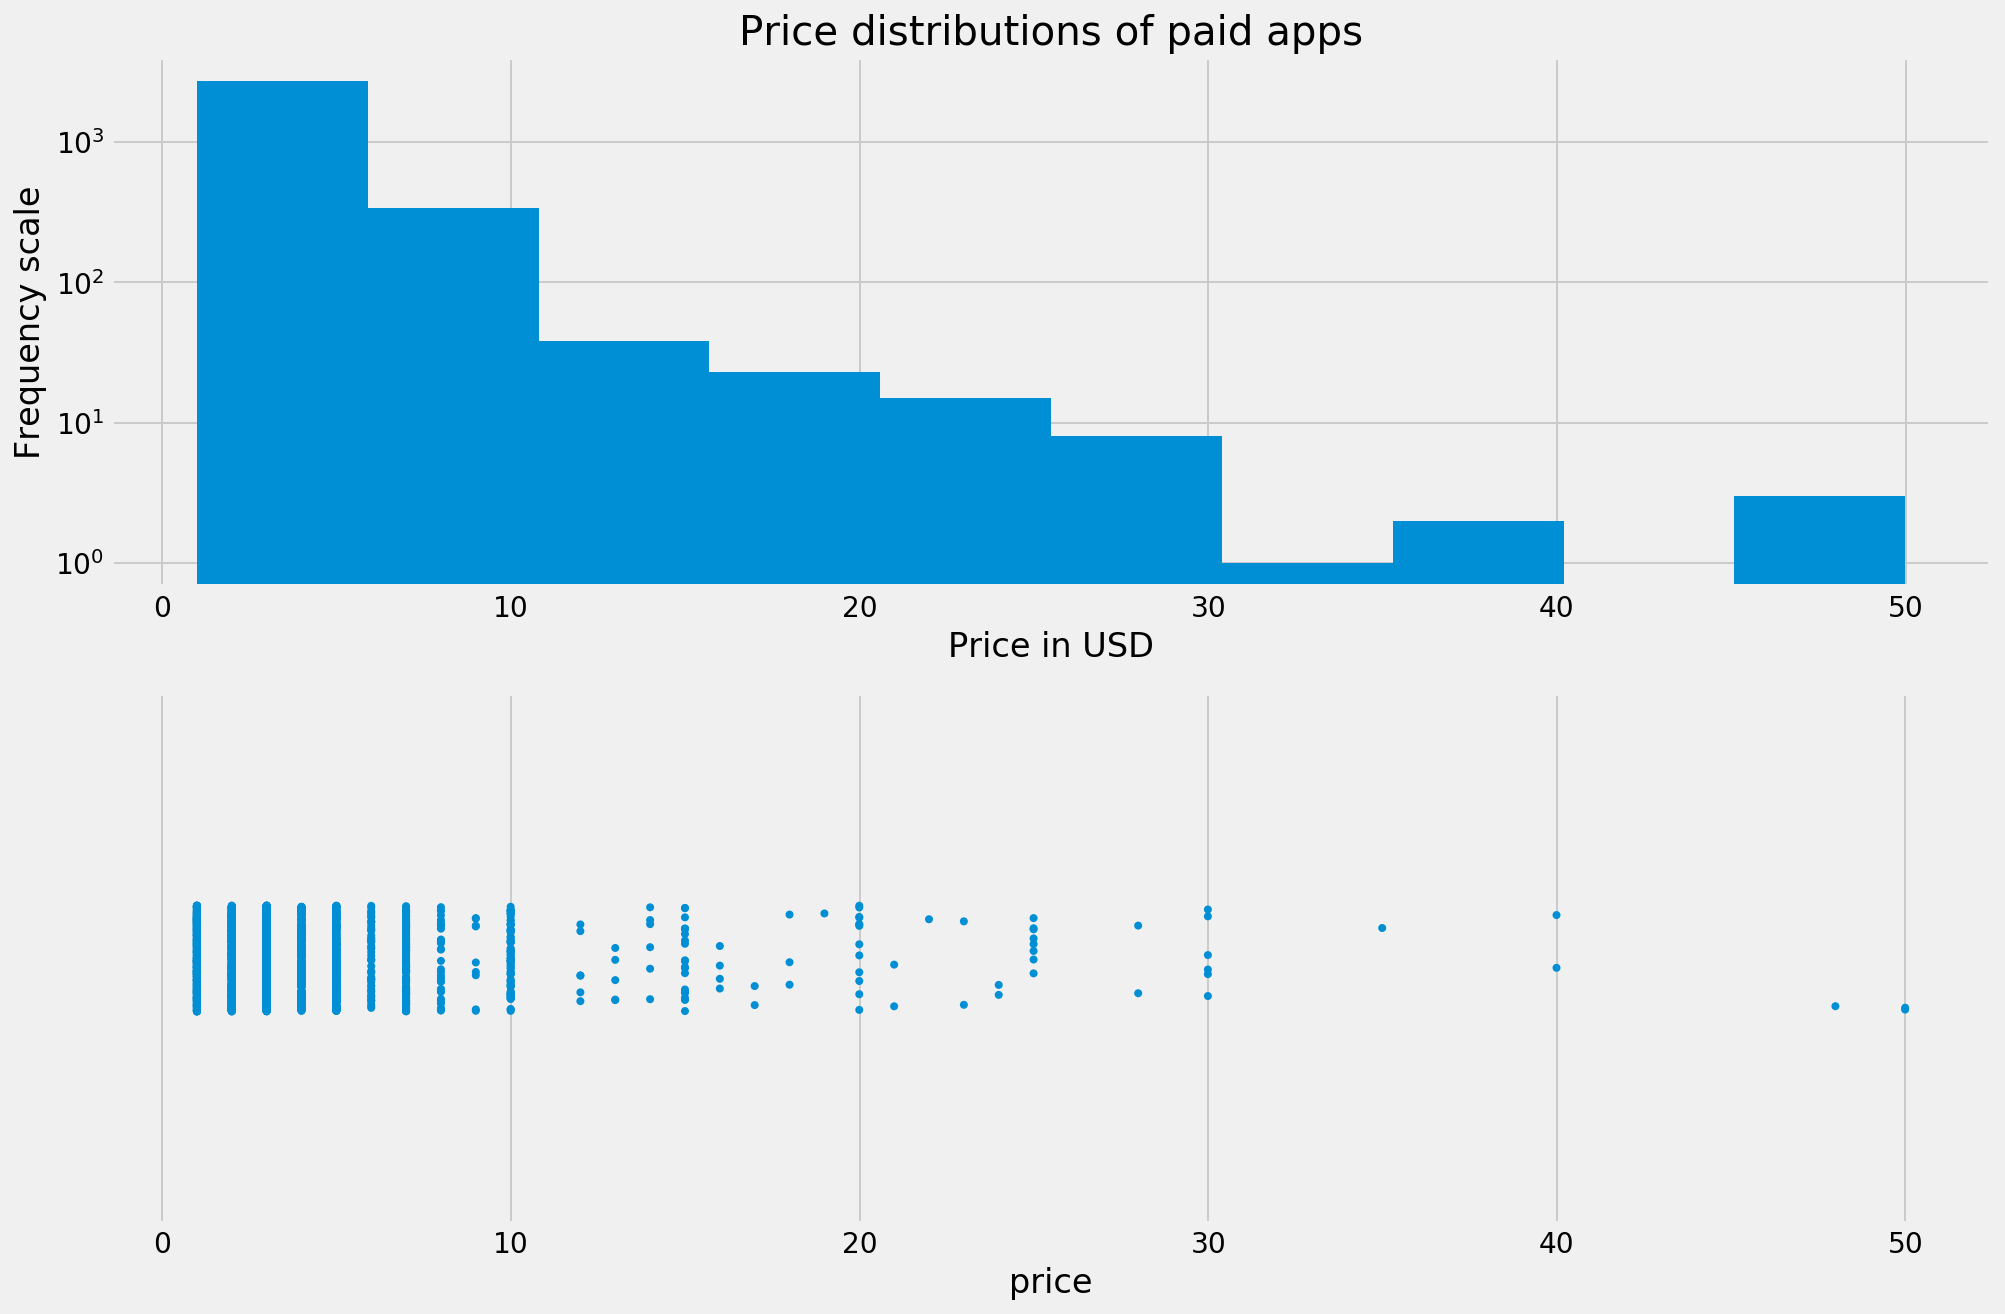

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

plt.hist(paid_apps.price, log=True)
plt.title("Price distributions of paid apps")
plt.ylabel('Frequency scale')
plt.xlabel('Price in USD')

plt.subplot(2, 1, 2)
# plt.title('Visual price distribution', loc='left')
sns.stripplot(data=paid_apps, y='price', jitter=True, orient='h', size=4)

plt.show()

- The observation here shows that count of apps decrease as proce increases

---
### Glance at price distributions based on App Genre:

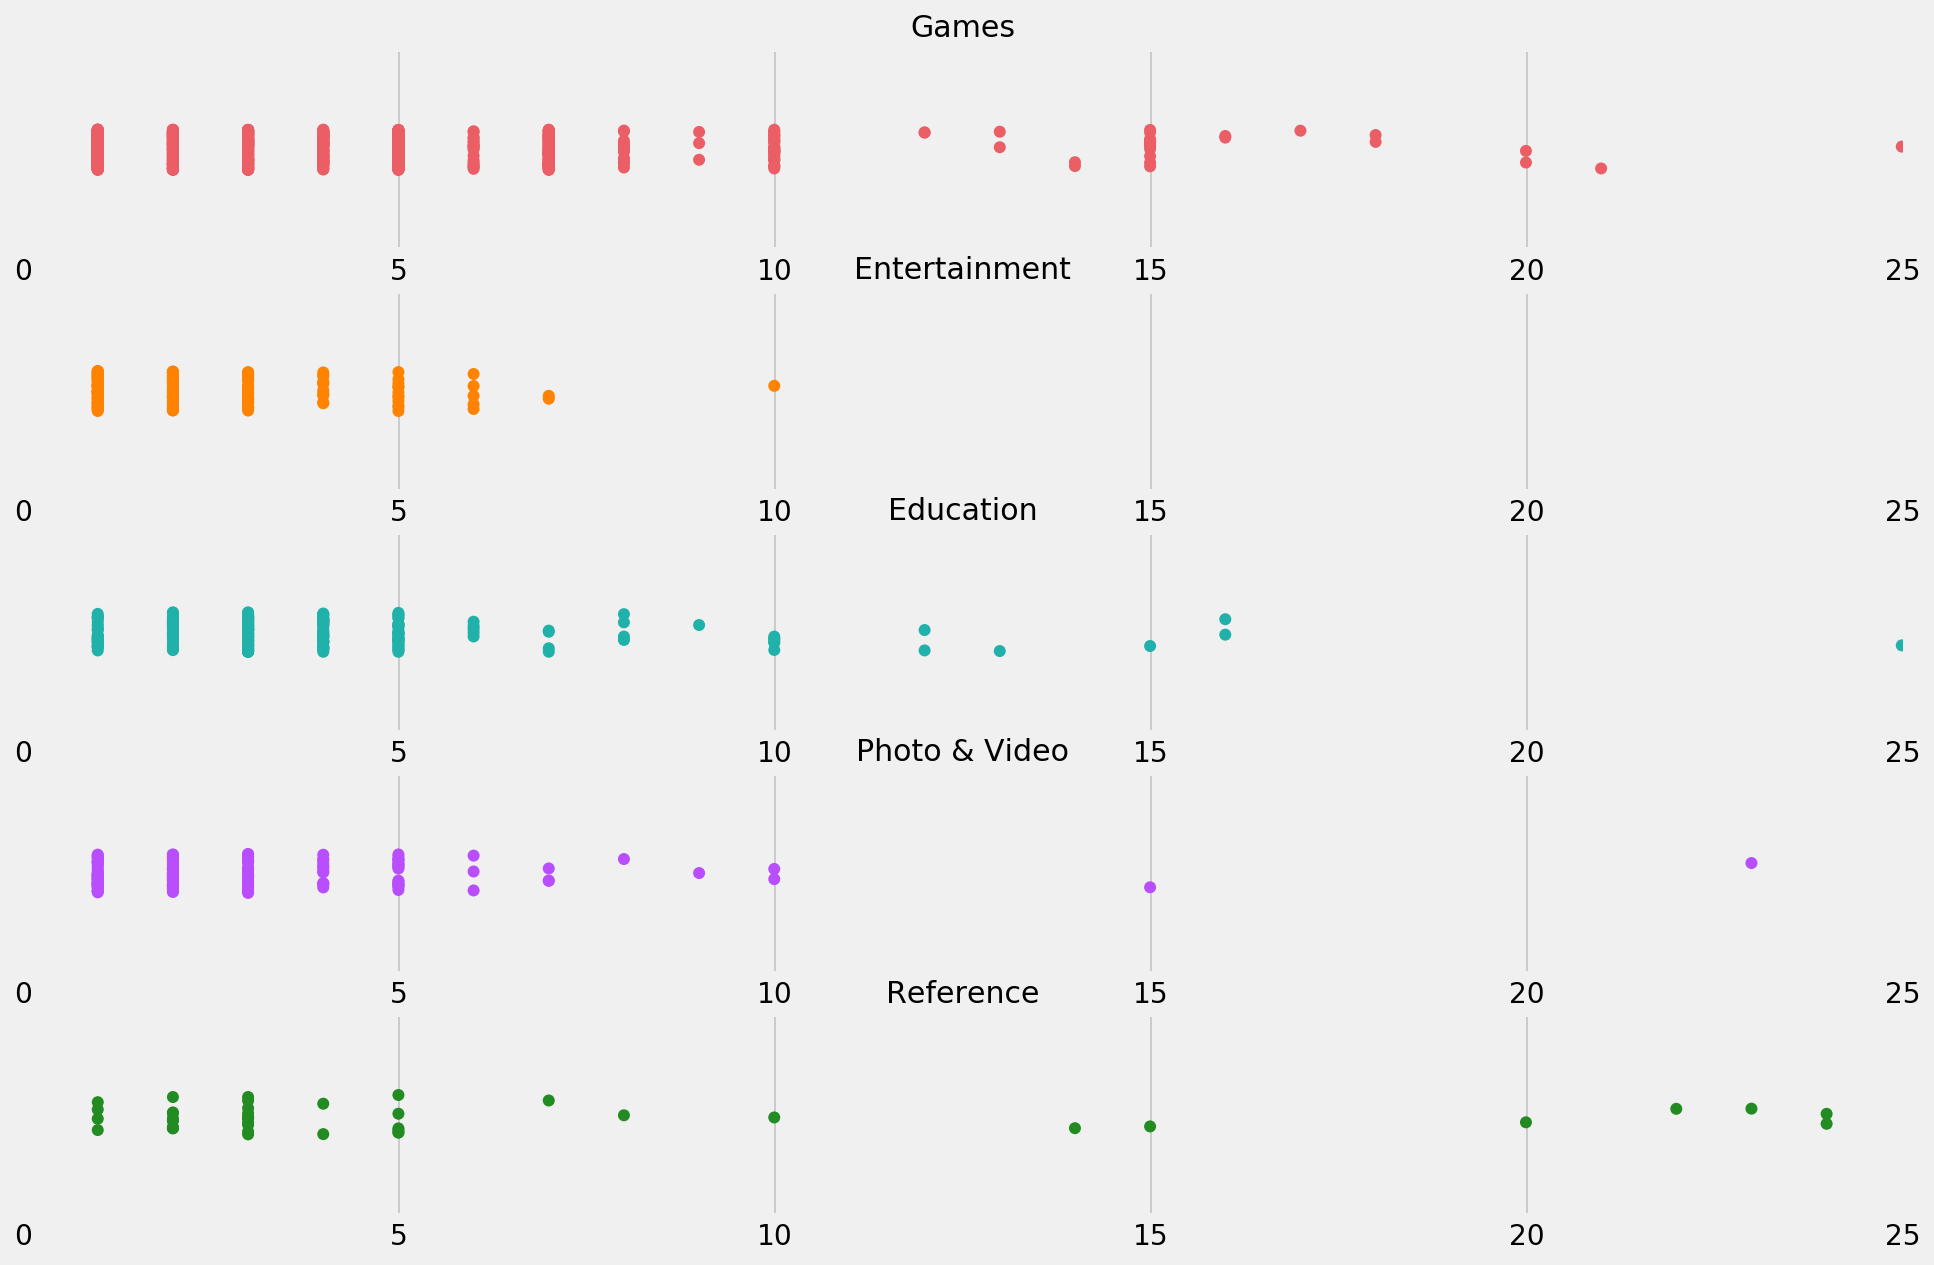

In [6]:
yrange = [0, 25]
fsize = 15

plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.xlim(yrange)
games = paid_apps[paid_apps.prime_genre=='Games']
sns.stripplot(data=games, y='price', jitter=True, orient='h', size=6, color='#eb5e66')
plt.title('Games', fontsize=fsize)
plt.xlabel('')

plt.subplot(5, 1, 2)
plt.xlim(yrange)
ent = paid_apps[paid_apps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter=True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('')

plt.subplot(5, 1, 3)
plt.xlim(yrange)
edu = paid_apps[paid_apps.prime_genre=='Education']
sns.stripplot(data=edu, y='price', jitter=True, orient='h', size=6, color='#20B2AA')
plt.title('Education', fontsize=fsize)
plt.xlabel('')

plt.subplot(5,1,4)
plt.xlim(yrange)
pv = paid_apps[paid_apps.prime_genre=='Photo & Video']
sns.stripplot(data=pv, y='price',jitter=True, orient='h', size=6, color='#b84efd')
plt.title('Photo & Video', fontsize=fsize)
plt.xlabel('')

plt.subplot(5,1,5)
plt.xlim(yrange)
ref = paid_apps[paid_apps.prime_genre=='Reference']
sns.stripplot(data=ref, y='price', jitter=True, orient='h', size=6, color='#228B22')
plt.title('Reference', fontsize=fsize)
plt.xlabel('')

plt.show()

### Insights

- Paid `'Games'` genre apps are fairly high priced and distribution extends to $25
- Paid `'Entertainment'` genre apps(`Netflix`, `Flixster`, etc) generally have low price range
- Paid `'Reference'` genre apps(`Bible Gateway`, `Advance English Dictionary`, etc) are mostly on the lower price spectrum with a few outliers.
- - -
There are a total of 23 `Genre`'s which is a bit too granualar and nuanced. We'll limit out `Genre` categories down to 6.

In [7]:
print(ios_data.prime_genre.value_counts()) # see list below
s = ios_data.prime_genre.value_counts().index[:5] # well slice the top 5 genres from below list

def categ(x):
    if x in s:
        return x
    else:
        return "Others"
ios_data['broad_genre'] = ios_data.prime_genre.apply(lambda x: categ(x))

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64


---
### Paid vs Free apps

Below we'll compare `paid` and `free` data sets below.

In [8]:
free = ios_data[ios_data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = ios_data[ios_data.price>0].broad_genre.value_counts().sort_index().to_frame()
total = ios_data.broad_genre.value_counts().sort_index().to_frame()

free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']

dist = free.join(paid).join(total)
dist['paid_per'] = dist.paid*100/dist.total
dist['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1057,693,1750,39.600000,60.400000
Photo & Video,167,182,349,52.148997,47.851003
Utilities,109,139,248,56.048387,43.951613


In [16]:
# pie chart
pies = dist[['free_per', 'paid_per']]
pies.columns = ['free %', 'paid %']
plt.show()



<Figure size 1440x1080 with 0 Axes>

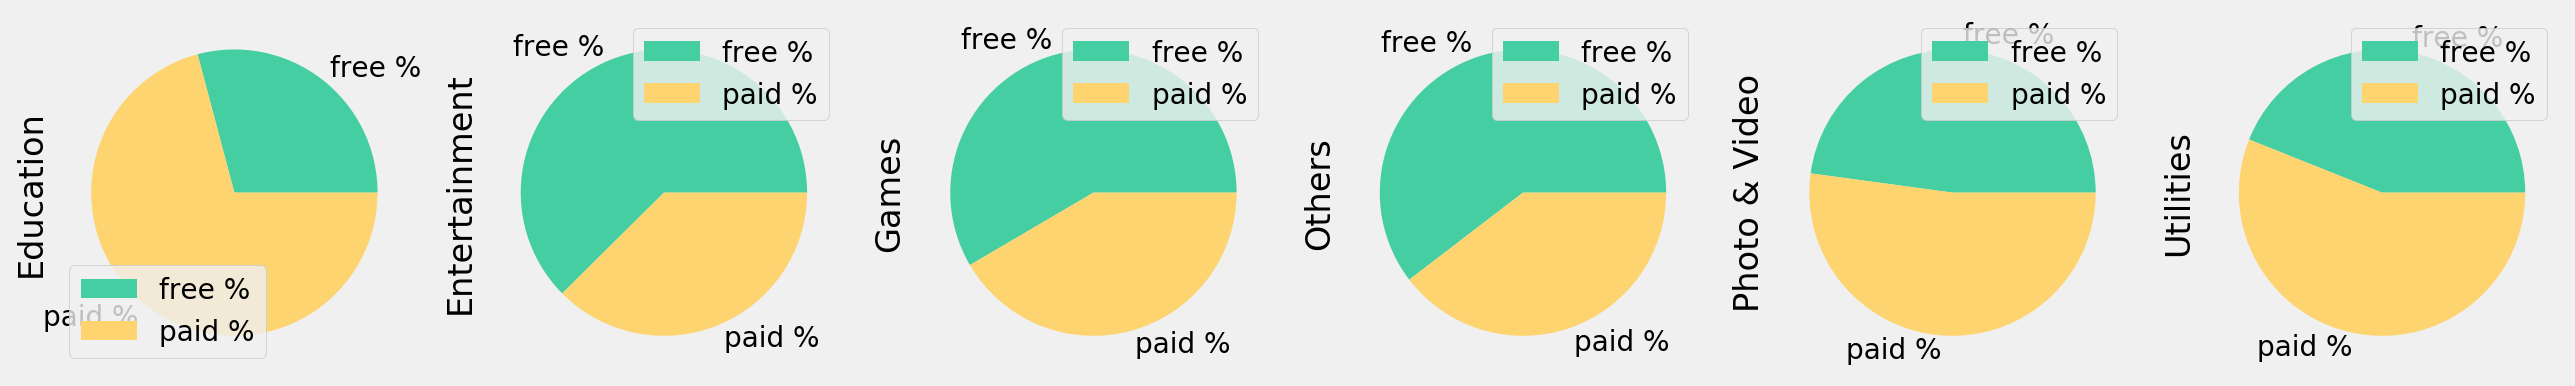

In [10]:
plt.figure(figsize=(20,15))
pies.T.plot.pie(subplots=True,figsize=(20,15),colors=['#45cea2','#fdd470'])
plt.show()

### Insights

- `'Education'` genre has a significant amount of paid apps.
- In comparison, `'Entertainment'` category hosts a high percentage of free apps.
---

Below lets asses wether paid apps do with user ratings:

In [11]:
def paid(x):
    if x > 0:
        return 'Paid'
    else:
        return 'Free'

ios_data['category'] = ios_data.price.apply(lambda x: paid(x))
ios_data.tail()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,broad_genre,category
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Games,Free
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,Games,Free
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,Utilities,Paid
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,Games,Free
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1,Games,Free


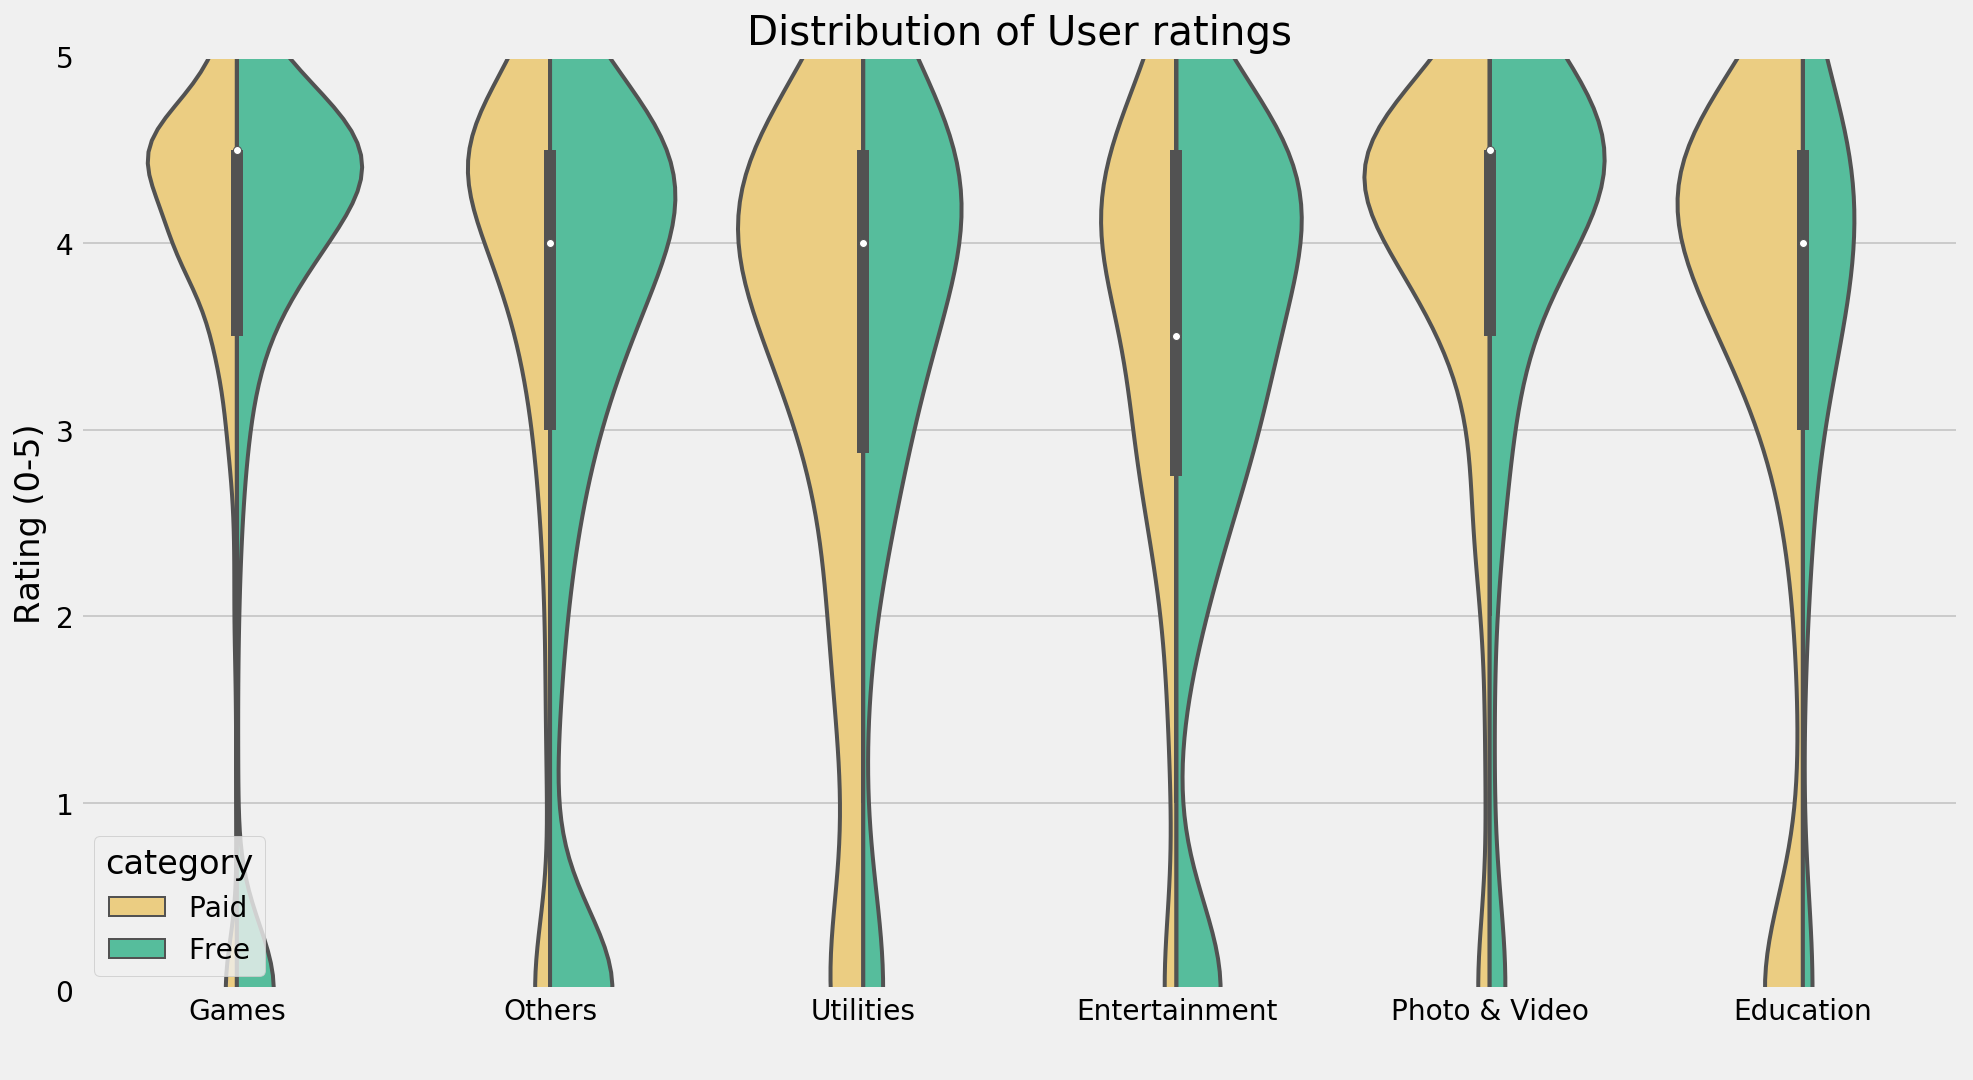

In [12]:
plt.figure(figsize=(15, 8))
plt.style.use('fast')
plt.ylim([0, 5])
plt.title("Distribution of User ratings")
sns.violinplot(data=ios_data, y='user_rating', x='broad_genre', hue='category',
              verticle=True, kde=False, split=True, linewidth=2,
              scale='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel('Rating (0-5)')

plt.show()

---
### Let us try a Swarm Plot to asses wether app size(MB) correlates with price
- Well use swarm below because it is great for:
>- Non overlap plot(it will plot each point seperately on the graph.)
>- Plotting many(100+) particular points.
>- Graphs expand horizontally.


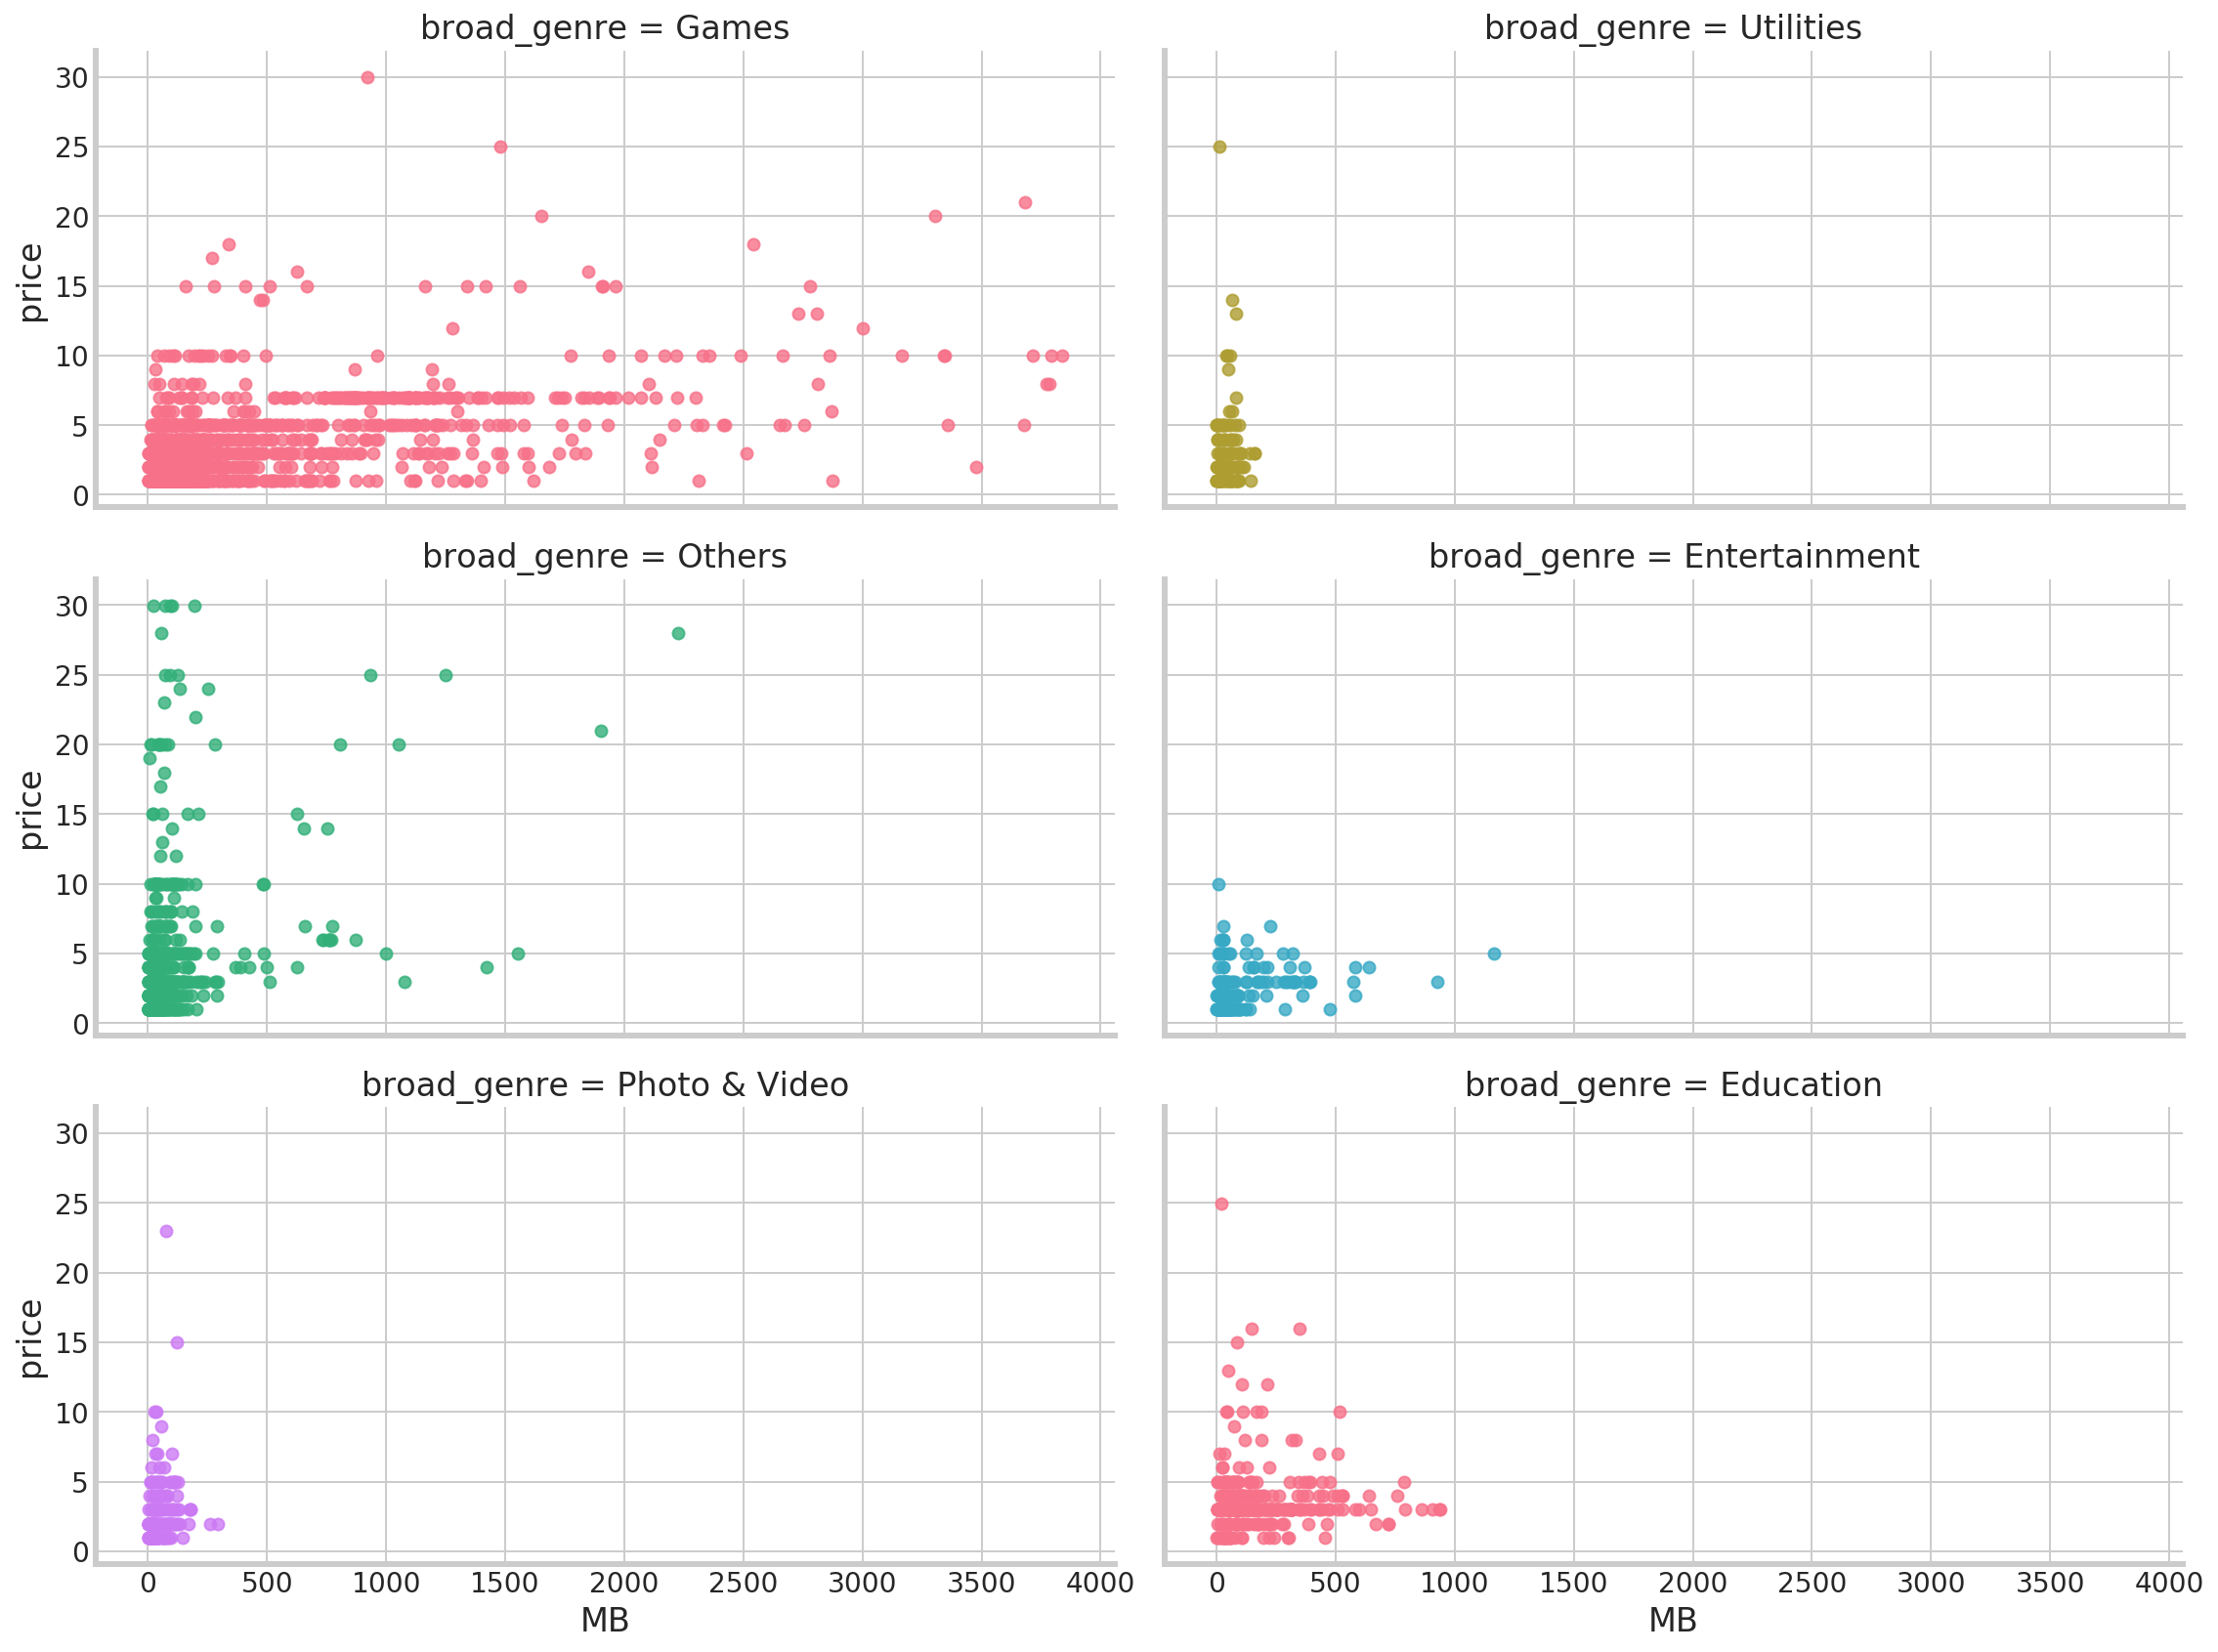

In [13]:
sns.color_palette("husl", 8)
sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
ios_data['MB'] = ios_data.size_bytes.apply(lambda x : x/1048576)
paidapps_regression = ios_data[((ios_data.price<30) & (ios_data.price>0))]
sns.lmplot(data=paidapps_regression,
           x='MB', y='price', height=4, aspect=2, col_wrap=2, hue='broad_genre',
           col='broad_genre', fit_reg=False, palette=sns.color_palette("husl", 5))
plt.show()

### How are the apps distributed category wise and can we split by paid category?

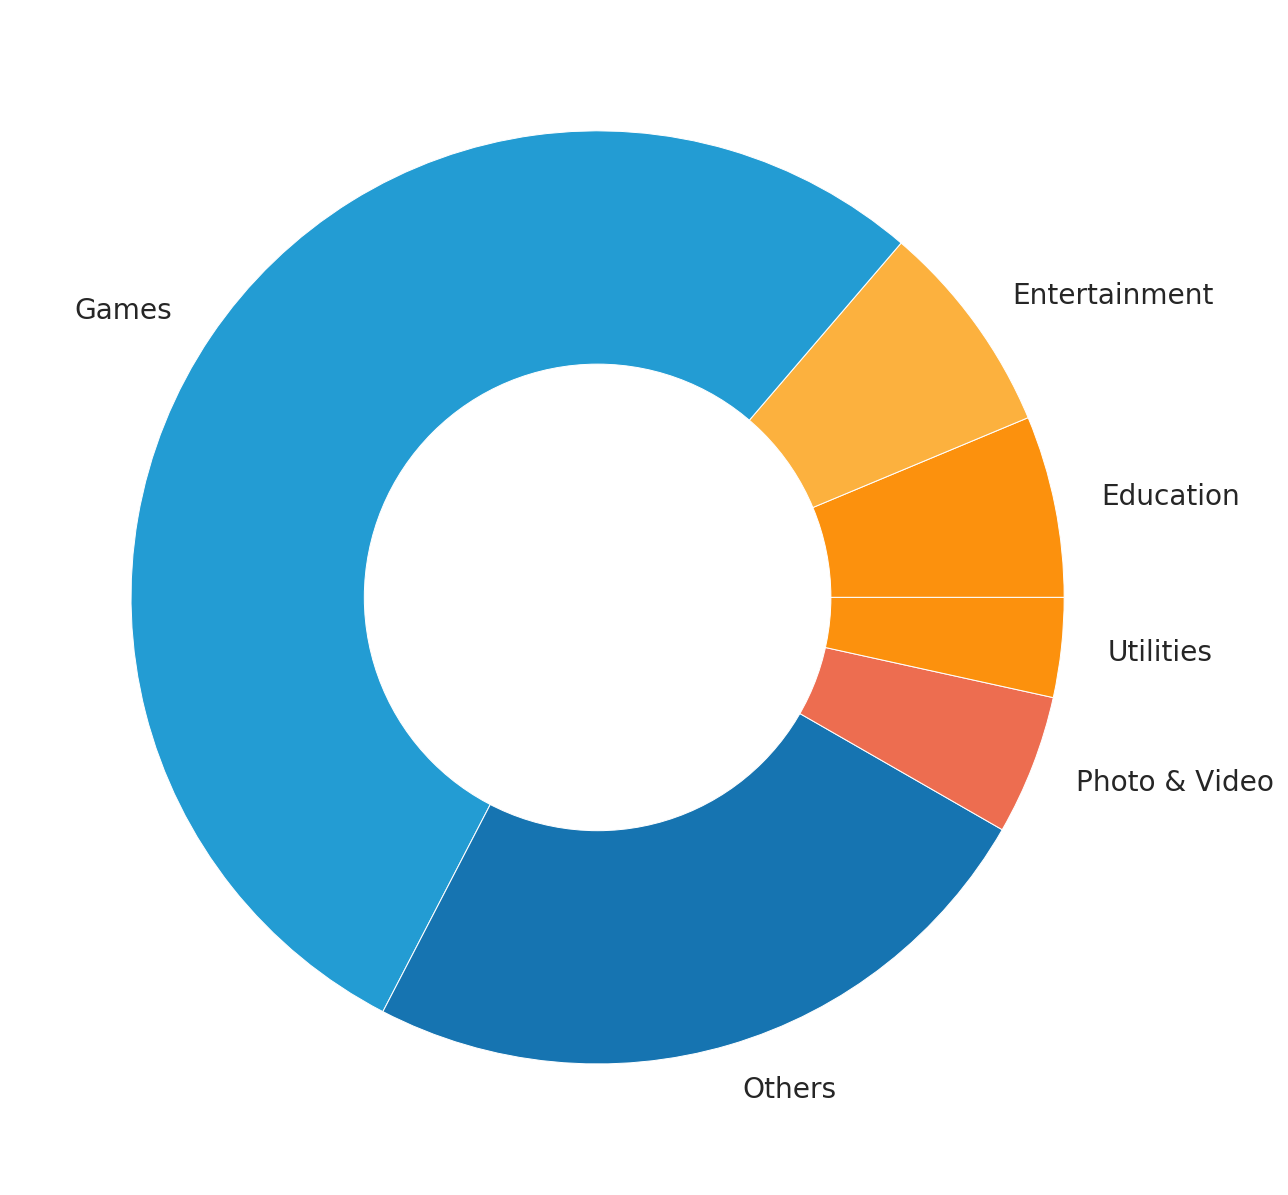

In [14]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names = ios_data.broad_genre.value_counts().sort_index().index
size = ios_data.broad_genre.value_counts().sort_index().tolist()
my_circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()